In [2]:
from functions import *
import numpy as np

/Users/zoestephens/Desktop/summer2024/.venv/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [60]:
# Loading data files

# embeddings
embeddings = pd.read_csv("csv_files/embeddings.csv")
embeddings2d = pd.read_csv("csv_files/embeddings2D.csv")

# kmeans clusters
clusterDf = pd.read_csv("csv_files/kmeansClusters.csv")

In [41]:
rows = embeddings.sample(n=10000)

In [42]:
from sklearn.cluster import SpectralClustering
labels = []
#for n in range(10,25):
for n in [20]:
    clustering = SpectralClustering(n_clusters=n).fit(rows.drop(["Description"],axis=1))
    labels.append(clustering.labels_)

In [56]:
for i in range(20):
    print("\n\nCluster "+str(i))
    count = 0
    for row in range(len(labels[0])):
        if count ==20:
            break
        if labels[0][row]==i:
            print(rows.iloc[row]['Description'])
            count +=1



Cluster 0
with balls, or full circles
le haut et le bas des caractères sont de longs segments de droite horizontaux.
boucle en bas à droite
контур буквы состоит из отрезков прямых
bonobos
rectilinear enclosed shape
3 flèches
flag ‘n bent flag 
lettres reposant sur une seule courbe
crossed lines
quelque chose vers le bas 
greek exclusive
contient un triangle fermé 
pavot du vent du sel
single-stroke (ignoring the top line)
un caractère réunit les formes des 2 autres.
2 éléments dissociés 
creux rond
oberste struktur: punkt von strich,+ andere struktur möglich
detached ticks


Cluster 1
cannot retain a small ball
cannot retain a small ball


Cluster 2
wifi
wifi


Cluster 3
éléphant
éléphant 


Cluster 4
has definitive completed hole
has completed hole
has completed hole
has completed hole
has completed hole


Cluster 5
exactly seven ends.
exactly seven ends.


Cluster 6
holds water
hold water
hold water
holds water
hold water


Cluster 7
exactly five ends.
exactly five ends.
exactly fi

<h2>Plotting the Intertias of Clusters</h2>
In order to determine the optimal number of clusters, the elbow test is often used. Below we graph the inertias from 5 to 50 clusters and look for an elbow. Unfortunately there is no clear elbow present, so in future analyses we use cluster numbers generally from 20-30 clusters.

In [ ]:
# Showing Inertias of kmeans and saving to file
# takes about 3 mins to run
kmeansToTest = range(5,50)
clusterDf = doKmeans(embeddings,kmeansToTest,showIntertias=True,saveInertias=True)

<h2>Visualizing Clusters</h2>
Below you can see a 2D visualization of the text clusters. The visualization is made by collapsing the embeddings into 2D and then graphing them based on the cluster nums chosen. The collapsing process has been explored through a variety of methods: T-SNE, PCA, and UMAP. UMAP parameters were modified to ensure the best clustering results.

In [77]:
import umap.umap_ as umap

reducer = umap.UMAP(n_neighbors=50,min_dist=0,metric='euclidean')
#newEmbeddings2D = pd.DataFrame(PCA(n_components=2).fit_transform(embeddings.drop("Description",axis=1)))
newEmbeddings2D = pd.DataFrame(reducer.fit_transform(embeddings.drop("Description",axis=1)))
#newEmbeddings2D = pd.DataFrame(reducer.fit_transform(rows.drop("Description",axis=1)))

# To Test
# manhattan
# canberra
# cosine
# hamming

In [ ]:
# 2D visualization of clusters

# import needed to choose colorscheme
import matplotlib.cm as cm

def visualize2D(embeddings2d,clusters,num,ignore=[]):
    # number of clusters to test
    clusterNum = num

    # colors and title
    colors = cm.tab20(np.linspace(0, 1, clusterNum))
    plt.figure(figsize=(7,6))
    plt.title("2D Cluster Representation")
    # scatter each cluster with the appropriate color
    for cluster in range(clusterNum):
        if cluster not in ignore:
            indexList = clusters.index[clusters['Kmeans '+str(clusterNum)] == cluster].tolist()
            this = embeddings2d.iloc[indexList]
            plt.scatter(this[0],this[1],color = colors[cluster],label="Cluster "+str(cluster))

    # add legend, show graph, and save graph to file

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig("../html_files/clusters.png",bbox_inches="tight")
    plt.show()

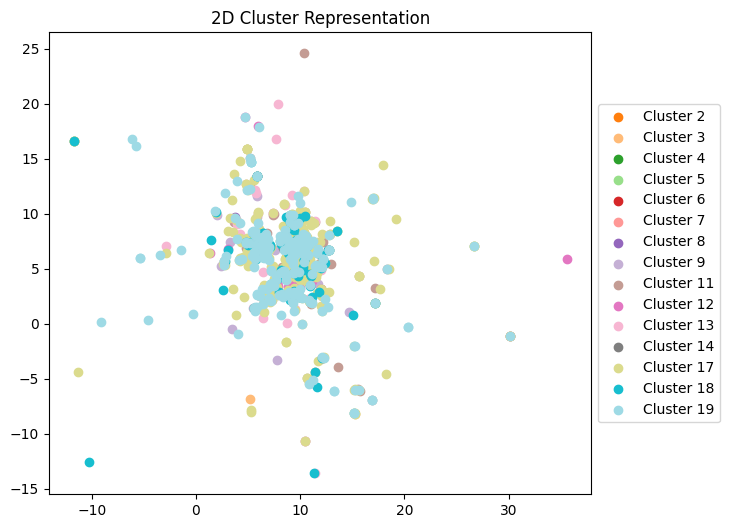

In [ ]:
newclusterDf = pd.DataFrame(labels[0],columns=['Kmeans 20'])
visualize2D(newEmbeddings2D,newclusterDf,20,ignore=[0,1,10,15,16])

In [65]:
printClusterSet(clusterDf,20)



Printing 20 cluster set:

Cluster 0
                                Description  Kmeans 20
0                                       ben          0
2                                       gos          0
15                                      abg          0
16                                       de          0
26                       haben etwas rundes          0
...                                     ...        ...
69019                         un seul trait          0
69020                   en forme de crochet          0
69021  fermée, mais qui nest pas une boucle          0
69023                               boucles          0
69024          avec une barre sur le dessus          0

[10607 rows x 2 columns]



Cluster 1
                                             Description  Kmeans 20
18                      an enlosed area open at the base          1
27         dreieck-struktur / winkel kleiner als 90 grad          1
29                            durch keine kreise beendet   

<h2>Examining Clusters</h2>
To manually look at the clusters of rules created, use the below function and scroll through the output.

In [5]:
# retrieve specific cluster data from a cluster number
clusterNum = 25
printClusterSet(clusterDf,clusterNum)



Printing 25 cluster set:

Cluster 0
                                          Description  Kmeans 25
25               exactly two (non-intersecting) lines          0
60                                    diagnonal lines          0
101                           lines below the horizon          0
102                           lines above the horizon          0
109               single line with at least one angle          0
...                                               ...        ...
68983      topologically equivalent to one plain line          0
68984  not topologically equivalent to one plain line          0
68985      topologically equivalent to one plain line          0
69002                    contains 3 unconnected lines          0
69004                    contains 2 unconnected lines          0

[2373 rows x 2 columns]



Cluster 1
                                  Description  Kmeans 25
42                                    triples          1
67                            